# FIT5196 Assessment 2
#### Student Name: Dong Lei Qian
#### Student ID: 29115566

Date: 19/09/2017

Version: 1.0

Environment: Python 2.7.11 and Jupyter notebook

Libraries used:
* pandas (for dataframe, included in Anaconda Python 2.7) 
* re (for regular expression, included in Anaconda Python 2.7) 
* numpy (for numpy array, included in Anaconda Python 2.7) 
* sklearn (for prediction models, included in Anaconda Python 2.7)
* math (for math operations, included in Anaconda Python 2.7)
* matplotlib (for plots, included in Anaconda Pythin 2.7)
* json (for reading json file format, included in Anaconda Python 2.7)
* datetime (for datetime conversion, included in Anaconda Python 2.7)
* scipy (for correlation calculation, included in Anaconda Python 2.7)

## 1. Introduction

The goal of the assessment is to wrangle a large set of property sales records stored in an unknown format and with unknown data quality issues. This assessment contains two major tasks that are specified as follows:

1. Load the data stored in “data.dat” into a pandas dataframe and examine the data, format the datafame so that it has 18 columns:
    * date - Date of the property sold, e.g., 20140502T000000
    * price - Property sold price
    * bedrooms - Number of bedrooms
    * bathrooms - Number of bathrooms, the value of which can be either an integer or a fraction ending with .25, .5, and .75. For example, 0.5 accounts for a room with a toilet but no shower 
    * sqft_living - Square footage of the property's interior living space, it is equal to the sum of basement area (i.e., sqft_basement) and the above living area (i.e., sqft_above) 
    * sqft_lot - Square footage of the land space
    * floors - Number of floors
    * waterfront - Whether the property was overlooking the waterfront or not
    * view - An index from 0 to 4 of how good the view of the property was
    * condition - An index from 1 to 5 on the condition of the property.
    * sqft_above - The square footage of the interior living space that is above ground level 
    * sqft_basement - The square footage of the interior living space that is below ground level
    * yr_built - The year the property was initially built 
    * yr_renovated - The year of the property's last renovation
    * street - The street address of the property, e.g., “3140 Franklin Ave E”
    * city - The city where the property is, e.g., “Seattle”
    * statezip - The zip code area where the property is, which contains state and zip code, separated by a space. For example, “WA 98115”, where WA is the abbreviation of Washington and the number is the zip code.
    * country - The country where the property is, e.g., “USA”
  
2. Inspect and audit the data to identify the data problems and fix the problems. Problems might include the following:
    * Lexical errors, e.g., typos and spelling mistakes
    * Irregularities, e.g., abnormal data values and data formats
    * Violations of the Integrity constraint.
    * Outliers
    * Duplications
    * Missing values
    * Inconsistency, e.g., inhomogeneity in values and types in representing the same data

# Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json
from pandas.io.json import json_normalize
import math
from sklearn.covariance import EllipticEnvelope
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats.stats import pearsonr
%matplotlib inline

# Load data

Read the data.dat file in python

In [22]:
with open('data.dat','r') as f:
    datafile = f.read()

In [23]:
datafile

'{"houses": [{"area": {"sqft_basement": 0, "sqft_above": 1340, "sqft_living/sqft_lot": "sqft_living/sqft_lot=1340\\\\ 7912"}, "yr_renovated": NaN, "price": 313000.0, "waterfront": 0, "floors": 1.5, "rooms": "Number of bathrooms: 1.5; Number of bedrooms: 3", "address": "18810 Densmore Ave N, Shoreline, WA 98133, USA", "date": "20140502T000000", "yr_built": 1955, "condition": 3, "view": 0}, {"area": {"sqft_basement": 280, "sqft_above": 3370, "sqft_living/sqft_lot": "sqft_living/sqft_lot=3650\\\\ 9050"}, "yr_renovated": NaN, "price": 2384000.0, "waterfront": 0, "floors": 2.0, "rooms": "Number of bathrooms: 2.5; Number of bedrooms: 5", "address": "709 W Blaine St, Seattle, WA 98119, USA", "date": "20140502T000000", "yr_built": 1921, "condition": 5, "view": 4}, {"area": {"sqft_basement": 0, "sqft_above": 1930, "sqft_living/sqft_lot": "sqft_living/sqft_lot=1930\\\\ 11947"}, "yr_renovated": NaN, "price": 342000.0, "waterfront": 0, "floors": 1.0, "rooms": "Number of bathrooms: 2.0; Number of b

This looks like a json file, let's read with json

In [24]:
data = json.loads(datafile)
print type(data)
data

<type 'dict'>


{u'houses': [{u'address': u'18810 Densmore Ave N, Shoreline, WA 98133, USA',
   u'area': {u'sqft_above': 1340,
    u'sqft_basement': 0,
    u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=1340\\ 7912'},
   u'condition': 3,
   u'date': u'20140502T000000',
   u'floors': 1.5,
   u'price': 313000.0,
   u'rooms': u'Number of bathrooms: 1.5; Number of bedrooms: 3',
   u'view': 0,
   u'waterfront': 0,
   u'yr_built': 1955,
   u'yr_renovated': nan},
  {u'address': u'709 W Blaine St, Seattle, WA 98119, USA',
   u'area': {u'sqft_above': 3370,
    u'sqft_basement': 280,
    u'sqft_living/sqft_lot': u'sqft_living/sqft_lot=3650\\ 9050'},
   u'condition': 5,
   u'date': u'20140502T000000',
   u'floors': 2.0,
   u'price': 2384000.0,
   u'rooms': u'Number of bathrooms: 2.5; Number of bedrooms: 5',
   u'view': 4,
   u'waterfront': 0,
   u'yr_built': 1921,
   u'yr_renovated': nan},
  {u'address': u'26206-26214 143rd Ave SE, Kent, WA 98042, USA',
   u'area': {u'sqft_above': 1930,
    u'sqft_basement': 0,

Now put it into a dataframe, we are interessted in the houses tag

In [568]:
houses = json_normalize(data['houses'])

In [307]:
houses.head()

,address,area.sqft_above,area.sqft_basement,area.sqft_living/sqft_lot,condition,date,floors,price,rooms,view,waterfront,yr_built,yr_renovated
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,sqft_living/sqft_lot=1340\ 7912,3,20140502T000000,1.5,313000.0,Number of bathrooms: 1.5; Number of bedrooms: 3,0,0,1955,NaN
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,sqft_living/sqft_lot=3650\ 9050,5,20140502T000000,2.0,2384000.0,Number of bathrooms: 2.5; Number of bedrooms: 5,4,0,1921,NaN
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,sqft_living/sqft_lot=1930\ 11947,4,20140502T000000,1.0,342000.0,Number of bathrooms: 2.0; Number of bedrooms: 3,0,0,1966,NaN
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,sqft_living/sqft_lot=2000\ 8030,4,20140502T000000,1.0,420000.0,Number of bathrooms: 2.25; Number of bedrooms: 3,0,0,1963,NaN
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,sqft_living/sqft_lot=1940\ 10500,4,20140502T000000,1.0,550000.0,Number of bedrooms: 4; Number of bathrooms: 2.5,0,0,1976,NaN


Check how many records

In [569]:
len(houses)

4601

# Seperate columns

We want to split rooms into bedrooms and bathrooms, first need to check if they are all in the same format. Add a temp column with first 20 characters in rooms and check if they are all the same

In [570]:
houses['rooms'].apply(lambda s: pd.Series({'temp': s[0:20]})).temp.unique()

array([u'Number of bathrooms:', u'Number of bedrooms: '], dtype=object)

Unfortunately the formats are different, some start with bathrooms and some start with bedrooms, so we need to add a check when we extract the information, add 2 new columns, berooms and bathrooms

In [571]:
newcol = houses['rooms'].apply(lambda s: pd.Series({'bedrooms': s.split(';')[1].split(':')[1].strip() if 'bedroom' in s.split(';')[1] else s.split(';')[0].split(':')[1].strip(),
                            'bathrooms':s.split(';')[0].split(':')[1].strip() if 'bathroom' in s.split(';')[0].strip() else s.split(';')[1].split(':')[1].strip()}))

houses = pd.concat([houses, newcol], axis=1) 

In [572]:
houses.head()

,address,area.sqft_above,area.sqft_basement,area.sqft_living/sqft_lot,condition,date,floors,price,rooms,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,sqft_living/sqft_lot=1340\ 7912,3,20140502T000000,1.5,313000.0,Number of bathrooms: 1.5; Number of bedrooms: 3,0,0,1955,NaN,1.5,3
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,sqft_living/sqft_lot=3650\ 9050,5,20140502T000000,2.0,2384000.0,Number of bathrooms: 2.5; Number of bedrooms: 5,4,0,1921,NaN,2.5,5
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,sqft_living/sqft_lot=1930\ 11947,4,20140502T000000,1.0,342000.0,Number of bathrooms: 2.0; Number of bedrooms: 3,0,0,1966,NaN,2.0,3
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,sqft_living/sqft_lot=2000\ 8030,4,20140502T000000,1.0,420000.0,Number of bathrooms: 2.25; Number of bedrooms: 3,0,0,1963,NaN,2.25,3
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,sqft_living/sqft_lot=1940\ 10500,4,20140502T000000,1.0,550000.0,Number of bedrooms: 4; Number of bathrooms: 2.5,0,0,1976,NaN,2.5,4


Ok this looks correct we can not remove rooms column

In [573]:
houses.drop('rooms',1,inplace=True)

Next do the same for area living/lot, first check the format is the same

In [574]:
houses['area.sqft_living/sqft_lot'].apply(lambda s: pd.Series({'temp': s[0:20]})).temp.unique()

array([u'sqft_living/sqft_lot'], dtype=object)

This one is the same, so add new columsn sqft_lving and sqft_lot and drop original column

In [575]:
newcol = houses['area.sqft_living/sqft_lot'].apply(lambda s: pd.Series({'sqft_living': s.split('\\')[0].split('=')[1].strip(),
                            'sqft_lot':s.split('\\')[1].strip()}))

houses = pd.concat([houses, newcol], axis=1) 

In [576]:
houses.drop('area.sqft_living/sqft_lot',1,inplace=True)

In [577]:
houses.head()

,address,area.sqft_above,area.sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot
0,"18810 Densmore Ave N, Shoreline, WA 98133, USA",1340,0,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,1.5,3,1340,7912
1,"709 W Blaine St, Seattle, WA 98119, USA",3370,280,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,2.5,5,3650,9050
2,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",1930,0,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,2.0,3,1930,11947
3,"857 170th Pl NE, Bellevue, WA 98008, USA",1000,1000,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,2.25,3,2000,8030
4,"9105 170th Ave NE, Redmond, WA 98052, USA",1140,800,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,2.5,4,1940,10500


Next have a look at address

In [578]:
houses.address.head()

0    18810 Densmore Ave N, Shoreline, WA 98133, USA
1           709 W Blaine St, Seattle, WA 98119, USA
2     26206-26214 143rd Ave SE, Kent, WA 98042, USA
3          857 170th Pl NE, Bellevue, WA 98008, USA
4         9105 170th Ave NE, Redmond, WA 98052, USA
Name: address, dtype: object

Looking at the addresses, we can use a regular expression to check if all of them have same format street, city, statezip and country

In [579]:
for address in houses.address:
    if bool(re.search(r'^.+, .+, WA 98\d{3}, USA',address)) == False:
            print(address)  

Looks like all of them have same format, so extract out to street, city, statezip and country and add to dataframe and drop address column

In [580]:
newcol = houses['address'].apply(lambda s: pd.Series({'street': s.split(',')[0].strip(),
                           'city': s.split(',')[1].strip(),
                           'statezip': s.split(',')[2].strip(),
                            'country': s.split(',')[3].strip()}))

houses = pd.concat([houses, newcol], axis=1) 

In [581]:
houses.drop('address',1,inplace=True)

Rename the columns to get the correct headings

In [582]:
houses.rename(columns = {'area.sqft_above':'sqft_above','area.sqft_basement':'sqft_basement'}, inplace=True)
houses.head()

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,city,country,statezip,street
0,1340,0,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,1.5,3,1340,7912,Shoreline,USA,WA 98133,18810 Densmore Ave N
1,3370,280,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,2.5,5,3650,9050,Seattle,USA,WA 98119,709 W Blaine St
2,1930,0,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,2.0,3,1930,11947,Kent,USA,WA 98042,26206-26214 143rd Ave SE
3,1000,1000,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,2.25,3,2000,8030,Bellevue,USA,WA 98008,857 170th Pl NE
4,1140,800,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,2.5,4,1940,10500,Redmond,USA,WA 98052,9105 170th Ave NE


Finally check dates are correct, first extract year out of the date column

In [583]:
year = houses.date.apply(lambda x: x[0:4])

In [584]:
year.unique()

array([u'2014', u'2305'], dtype=object)

Year 2305? that looks like a mistake

In [585]:
year.value_counts()

2014    4600
2305       1
Name: date, dtype: int64

There is only one have a look at the row

In [586]:
year[year == '2305'].index[0]

4335

In [587]:
houses['date'][4335]

u'23052014T000000'

Looks like it should be 20140523

In [588]:
houses.loc[4335,'date'] = '20140523T000000'

In [589]:
houses['date'][4335]

'20140523T000000'

Check all the months are valid

In [590]:
month = houses.date.apply(lambda x: x[4:6])

In [591]:
month.unique()

array([u'05', u'06', u'07'], dtype=object)

Then check all the days

In [592]:
day = houses.date.apply(lambda x: x[6:8])

In [593]:
day.unique()

array([u'02', u'03', u'04', u'05', u'06', u'07', u'08', u'09', u'10',
       u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18', u'19',
       u'20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28',
       u'29', u'30', u'31', u'01'], dtype=object)

Have a look at time

In [594]:
time = houses.date.apply(lambda x: x[8:])

In [595]:
time.unique()

array([u'T000000'], dtype=object)

They are all the same

Convert all formats to numeric if possible

In [596]:
houses = houses.convert_objects(convert_numeric=True)

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [336]:
houses.head()

,sqft_above,sqft_basement,condition,date,floors,price,view,waterfront,yr_built,yr_renovated,bathrooms,bedrooms,sqft_living,sqft_lot,city,country,statezip,street
0,1340,0,3,20140502T000000,1.5,313000.0,0,0,1955,NaN,1.50,3,1340,7912,Shoreline,USA,WA 98133,18810 Densmore Ave N
1,3370,280,5,20140502T000000,2.0,2384000.0,4,0,1921,NaN,2.50,5,3650,9050,Seattle,USA,WA 98119,709 W Blaine St
2,1930,0,4,20140502T000000,1.0,342000.0,0,0,1966,NaN,2.00,3,1930,11947,Kent,USA,WA 98042,26206-26214 143rd Ave SE
3,1000,1000,4,20140502T000000,1.0,420000.0,0,0,1963,NaN,2.25,3,2000,8030,Bellevue,USA,WA 98008,857 170th Pl NE
4,1140,800,4,20140502T000000,1.0,550000.0,0,0,1976,NaN,2.50,4,1940,10500,Redmond,USA,WA 98052,9105 170th Ave NE


In [337]:
houses.dtypes

sqft_above         int64
sqft_basement      int64
condition          int64
date              object
floors           float64
price            float64
view               int64
waterfront         int64
yr_built           int64
yr_renovated     float64
bathrooms        float64
bedrooms           int64
sqft_living        int64
sqft_lot           int64
city              object
country           object
statezip          object
street            object
dtype: object

Rearrange the columns

In [597]:
houses = houses[['date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','city','statezip','country']]   

In [598]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,20140502T000000,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,20140502T000000,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,20140502T000000,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,20140502T000000,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,20140502T000000,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA


# Irregularities
For this section check for any irregularities such as irregular date

I want to convert date column to date time

In [340]:
houses.date = pd.to_datetime(houses.date,format = '%Y%m%dT%H%M%S')

ValueError: day is out of range for month

We are getting an error, let's have a look at all the dates

In [341]:
houses.date.unique()

array([u'20140502T000000', u'20140503T000000', u'20140504T000000',
       u'20140505T000000', u'20140506T000000', u'20140507T000000',
       u'20140508T000000', u'20140509T000000', u'20140510T000000',
       u'20140511T000000', u'20140512T000000', u'20140513T000000',
       u'20140514T000000', u'20140515T000000', u'20140516T000000',
       u'20140517T000000', u'20140518T000000', u'20140519T000000',
       u'20140520T000000', u'20140521T000000', u'20140522T000000',
       u'20140523T000000', u'20140524T000000', u'20140525T000000',
       u'20140526T000000', u'20140527T000000', u'20140528T000000',
       u'20140529T000000', u'20140530T000000', u'20140531T000000',
       u'20140601T000000', u'20140602T000000', u'20140603T000000',
       u'20140604T000000', u'20140605T000000', u'20140606T000000',
       u'20140607T000000', u'20140608T000000', u'20140609T000000',
       u'20140610T000000', u'20140611T000000', u'20140612T000000',
       u'20140613T000000', u'20140614T000000', u'20140615T0000

Ok there is a 2014-06-31? It must be a mistake, can we see what the dates are for the surrounding records

In [342]:
houses[houses.date == '20140631T000000']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4334,20140631T000000,248000.0,3,1.0,950,9400,1.0,0,0,4,950,0,1954,NaN,3920 153rd Ave SE,Bellevue,WA 98006,USA


In [343]:
houses[(houses.index > 4331) & (houses.index < 4337)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4332,20140610T000000,278500.0,4,2.30,1940,6206,2.0,0,0,3,1940,0,1990,NaN,32900 19th Ave SW,Federal Way,WA 98023,USA
4333,20140623T000000,205425.0,2,1.70,880,6780,1.0,0,0,4,880,0,1945,NaN,11440 69th Pl S,Seattle,WA 98178,USA
4334,20140631T000000,248000.0,3,1.00,950,9400,1.0,0,0,4,950,0,1954,NaN,3920 153rd Ave SE,Bellevue,WA 98006,USA
4335,20140523T000000,505000.0,3,2.25,1670,1596,2.0,0,0,3,1220,450,2002,NaN,3019 30th Ave W,Seattle,WA 98199,USA
4336,20140522T000000,657500.0,3,2.50,2670,10496,2.0,0,0,3,2670,0,1989,NaN,1917 235th Ct NE,Sammamish,WA 98074,USA


They are not ordered by date, so we don't know what is the correct date, just guess should be 06-30

In [599]:
houses.loc[houses.date == '20140631T000000','date'] = '20140630T000000'

Now can convert this column to datetime

In [600]:
houses.date = pd.to_datetime(houses.date,format = '%Y%m%dT%H%M%S')

In [601]:
houses.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

# Lexical error
In this section look for mispellings

first check all cities are spelt correctly

In [602]:
set(houses.city.unique())

{u'Algona',
 u'Auburn',
 u'Auburnt',
 u'Beaux Arts Village',
 u'Belleview',
 u'Bellevue',
 u'Bellvue',
 u'Black Diamond',
 u'Bothell',
 u'Burien',
 u'Carnation',
 u'Clyde Hill',
 u'Coronation',
 u'Covington',
 u'Des Moines',
 u'Duvall',
 u'Enumclaw',
 u'Fall City',
 u'Federal Way',
 u'Inglewood-Finn Hill',
 u'Issaguah',
 u'Issaquah',
 u'Kenmore',
 u'Kent',
 u'Kirkland',
 u'Kirklund',
 u'Lake Forest Park',
 u'Maple Valley',
 u'Medina',
 u'Mercer Island',
 u'Milton',
 u'Newcastle',
 u'Normandy Park',
 u'North Bend',
 u'Pacific',
 u'Preston',
 u'Ravensdale',
 u'Redmond',
 u'Redmonde',
 u'Redmund',
 u'Renton',
 u'Samamish',
 u'Sammamish',
 u'SeaTac',
 u'Seaattle',
 u'Seatle',
 u'Seattle',
 u'Shoreline',
 u'Skykomish',
 u'Snogualmie',
 u'Snoqualmie',
 u'Snoqualmie Pass',
 u'Sureline',
 u'Tukwila',
 u'Vashon',
 u'Woodenville',
 u'Woodinville',
 u'Yarrow Point',
 u'auburn',
 u'redmond',
 u'sammamish',
 u'seattle'}

Auburn and Auburnt? Check statezip and look online to see which one is correct

In [603]:
houses[houses.city == 'Auburnt']['statezip'].unique()

array([u'WA 98001'], dtype=object)

In [604]:
houses[houses.city == 'Auburn']['statezip'].unique()

array([u'WA 98092', u'WA 98001', u'WA 98002'], dtype=object)

Auburn is correct, so change Auburnt and auburn to Auburn

In [605]:
houses.city.replace({'Auburnt':'Auburn','auburn':'Auburn'},inplace=True)

Do the same for all other cities

In [606]:
houses[houses.city == 'Belleview']['statezip'].unique()

array([u'WA 98008'], dtype=object)

In [607]:
houses[houses.city == 'Bellvue']['statezip'].unique()

array([u'WA 98008'], dtype=object)

In [608]:
houses[houses.city == 'Bellevue']['statezip'].unique()

array([u'WA 98008', u'WA 98007', u'WA 98006', u'WA 98005', u'WA 98004'], dtype=object)

In [609]:
houses.city.replace({'Belleview':'Bellevue','Bellvue':'Bellevue'},inplace=True)

In [610]:
houses[houses.city == 'Issaguah']['statezip'].unique()

array([u'WA 98029'], dtype=object)

In [611]:
houses[houses.city == 'Issaquah']['statezip'].unique()

array([u'WA 98029', u'WA 98027', u'WA 98075'], dtype=object)

In [612]:
houses.city.replace({'Issaguah':'Issaquah'},inplace=True)

In [613]:
houses[houses.city == 'Kirklund']['statezip'].unique()

array([u'WA 98034'], dtype=object)

In [614]:
houses[houses.city == 'Kirkland']['statezip'].unique()

array([u'WA 98033', u'WA 98034'], dtype=object)

In [615]:
houses.city.replace({'Kirklund':'Kirkland'},inplace=True)

In [616]:
houses[houses.city == 'Redmonde']['statezip'].unique()

array([u'WA 98052'], dtype=object)

In [617]:
houses[houses.city == 'Redmond']['statezip'].unique()

array([u'WA 98052', u'WA 98053', u'WA 98074'], dtype=object)

In [618]:
houses[houses.city == 'Redmund']['statezip'].unique()

array([u'WA 98052'], dtype=object)

In [619]:
houses.city.replace({'redmond':'Redmond','Redmonde':'Redmond','Redmund':'Redmond'},inplace=True)

In [620]:
houses[houses.city == 'Samamish']['statezip'].unique()

array([u'WA 98074'], dtype=object)

In [621]:
houses[houses.city == 'Sammamish']['statezip'].unique()

array([u'WA 98074', u'WA 98075'], dtype=object)

In [622]:
houses.city.replace({'sammamish':'Sammamish','Samamish':'Sammamish'},inplace=True)

In [623]:
houses[houses.city == 'Seaattle']['statezip'].unique()

array([u'WA 98108'], dtype=object)

In [624]:
houses[houses.city == 'Seatle']['statezip'].unique()

array([u'WA 98117'], dtype=object)

In [625]:
houses[houses.city == 'Seattle']['statezip'].unique()

array([u'WA 98119', u'WA 98115', u'WA 98105', u'WA 98106', u'WA 98102',
       u'WA 98125', u'WA 98136', u'WA 98117', u'WA 98107', u'WA 98116',
       u'WA 98199', u'WA 98122', u'WA 98103', u'WA 98112', u'WA 98118',
       u'WA 98177', u'WA 98133', u'WA 98144', u'WA 98146', u'WA 98109',
       u'WA 98126', u'WA 98178', u'WA 98168', u'WA 98108', u'WA 98148'], dtype=object)

In [626]:
houses.city.replace({'seattle':'Seattle','Seatle':'Seattle','Seaattle':'Seattle'},inplace=True)

In [627]:
houses[houses.city == 'Snogualmie']['statezip'].unique()

array([u'WA 98065'], dtype=object)

In [628]:
houses[houses.city == 'Snoqualmie']['statezip'].unique()

array([u'WA 98065'], dtype=object)

In [629]:
houses[houses.city == 'Snoqualmie Pass']['statezip'].unique()

array([u'WA 98068'], dtype=object)

Snoqualmie Pass is a different city

In [630]:
houses.city.replace({'Snogualmie':'Snoqualmie'},inplace=True)

In [631]:
houses[houses.city == 'Woodenville']['statezip'].unique()

array([u'WA 98077', u'WA 98072'], dtype=object)

In [632]:
houses[houses.city == 'Woodinville']['statezip'].unique()

array([u'WA 98072', u'WA 98077'], dtype=object)

In [633]:
houses.city.replace({'Woodenville':'Woodinville'},inplace=True)

In [634]:
houses[houses.city == 'Coronation']['statezip'].unique()

array([u'WA 98014'], dtype=object)

In [635]:
houses[houses.city == 'Carnation']['statezip'].unique()

array([u'WA 98014'], dtype=object)

In [636]:
houses.city.replace({'Coronation':'Carnation'},inplace=True)

In [637]:
houses[houses.city == 'Sureline']['statezip'].unique()

array([u'WA 98155'], dtype=object)

In [638]:
houses[houses.city == 'Shoreline']['statezip'].unique()

array([u'WA 98133', u'WA 98155', u'WA 98177'], dtype=object)

In [639]:
houses.city.replace({'Sureline':'Shoreline'},inplace=True)

All done, just check everyhting is correct

In [640]:
set(houses.city.unique())

{u'Algona',
 u'Auburn',
 u'Beaux Arts Village',
 u'Bellevue',
 u'Black Diamond',
 u'Bothell',
 u'Burien',
 u'Carnation',
 u'Clyde Hill',
 u'Covington',
 u'Des Moines',
 u'Duvall',
 u'Enumclaw',
 u'Fall City',
 u'Federal Way',
 u'Inglewood-Finn Hill',
 u'Issaquah',
 u'Kenmore',
 u'Kent',
 u'Kirkland',
 u'Lake Forest Park',
 u'Maple Valley',
 u'Medina',
 u'Mercer Island',
 u'Milton',
 u'Newcastle',
 u'Normandy Park',
 u'North Bend',
 u'Pacific',
 u'Preston',
 u'Ravensdale',
 u'Redmond',
 u'Renton',
 u'Sammamish',
 u'SeaTac',
 u'Seattle',
 u'Shoreline',
 u'Skykomish',
 u'Snoqualmie',
 u'Snoqualmie Pass',
 u'Tukwila',
 u'Vashon',
 u'Woodinville',
 u'Yarrow Point'}

In [641]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA


# Look at Inconsistency
In this section look for inconsistency, such as different format in street

The street format should be number streetName streetType direction, but some street have direction before street name, like this one '709 W Blaine St', use a regular expression to fix this

In [642]:
for i in range(len(houses.street)):
    if bool(re.search(r'^\d+(-\d+)*\w* \w+( \w+)* \w+ (E|W|S|N|SW|NW|SE|NE)$',houses.street[i])) == False:
            direction = re.findall(r'^\d+(?:-\d+)*\w* (E|W|S|N|SW|NW|SE|NE) .+$',houses.street[i])
            if len(direction) != 0:
                if direction[0] != '':
                    newstreet = houses.street[i].replace(direction[0] + ' ','') + ' ' + direction[0]
                    houses.loc[i,'street'] = newstreet

Next I want to extract all street types

In [643]:
streetname = []
for street in houses.street:
    temp = re.findall(r'.* (\w+[a-z])(?: (?:E|W|S|N|SW|NW|SE|NE))*$',street)
    if len(temp) != 0:
        streetname.append(temp[0])
        
print(set(streetname))

set([u'Northeast', u'Court', u'Ln', u'Rd', u'Way', u'Crest', u'Pl', u'Promenade', u'Trail', u'South', u'Key', u'Hwy', u'Dr', u'St', u'Cir', u'Pkwy', u'Loop', u'Esplanade', u'Walk', u'Terrace', u'Blvd', u'Ave', u'Strasse', u'Ct'])


Ok there are some directions in here like Northest and South, we need to fix, also Court should be Ct, and Avenue should be Ave, but for now add to the regular expression so we can extract street types properly. Is Strasse a street type? After checking on internet this looks correct

In [644]:
streetname = []
for street in houses.street:
    temp = re.findall(r'.* (\w+[a-z])(?: (?:South|Northeast|E|W|S|N|SW|NW|SE|NE))+$',street)
    if len(temp) != 0:
        streetname.append(temp[0])
        
print(set(streetname))

set([u'Loop', u'Walk', u'Crest', u'Ln', u'Dr', u'Esplanade', u'St', u'Rd', u'Cir', u'Terrace', u'Way', u'Hwy', u'Blvd', u'Ave', u'Pkwy', u'Avenue', u'Pl', u'Ct'])


There are some extra ones we didn't get before

Are there any streets types using all capital letters

In [645]:
streetname = []
for street in houses.street:
    temp = re.findall(r'.* (\w+[A-Z])(?: (?:South|Northeast|E|W|S|N|SW|NW|SE|NE))+$',street)
    if len(temp) != 0:
        streetname.append(temp[0])
        
print(set(streetname))

set([u'PI'])


Ok we can fix all the problems

In [646]:
for i in range(len(houses.street)):
    if bool(re.search(r'^\d+(-\d+)*\w* \w+( \w+)* (Ave|Blvd|Ct|Cir|Crest|Dr|Esplanade|Hwy|Key|Ln|Loop|Pl|Pkwy|Rd|Strasse|St|Tail|Terrace|Walk|Way) (E|W|S|N|SW|NW|SE|NE)$',houses.street[i])) == False:
        street = re.sub('South','S',houses.street[i])
        street = re.sub('Northeast','NE',street)
        street = re.sub('Avenue','Ave',street)
        street = re.sub('Court','Ct',street)
        street = re.sub('PI','Pl',street)
        houses.loc[i,'street'] = street

Just double check with our new regular expresson

In [1]:
for street in houses.street:
    if bool(re.search(r'^\d+(-\d+)*\w* \w+( \w+)* (Ave|Blvd|Ct|Cir|Crest|Dr|Esplanade|Hwy|Key|Ln|Loop|Pl|Pkwy|Rd|Strasse|St|Trail|Terrace|Walk|Way)( (E|W|S|N|SW|NW|SE|NE))*$',street)) == False:
        print(street)

NameError: name 'houses' is not defined

It looks fine, we can leave these ones

In [393]:
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 Blaine St W,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA


# Look for violations of rules
In this setion we will look at violation of rules

In [394]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.601000e+03,4601.000000,4601.000000,4601.000000,4.601000e+03,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,229.000000
mean,5.345240e+05,3.400782,2.160763,2139.218865,1.485157e+04,1.512171,0.007172,0.240600,3.451641,1827.448598,312.013693,1970.790263,1995.707424
std,5.716016e+05,0.908769,0.783810,963.087096,3.588059e+04,0.538278,0.084395,0.778328,0.677189,862.164780,464.109581,29.729829,18.590155
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,1912.000000
25%,3.099500e+05,3.000000,1.750000,1460.000000,5.001000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,1988.000000
50%,4.535000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,2001.000000
75%,6.500000e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,2009.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Houses have 0 price?

In [395]:
len(houses[houses.price == 0])

248

Ok there are a few of them, will treat this as missing values to deal with later

sqft_living = sqft_basement + sqft_above, so check if any of these are not met

In [396]:
houses[houses.sqft_above + houses.sqft_basement != houses.sqft_living]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4338,2014-07-10,670000.0,3,2.5,1280,1438,2.0,0,0,3,1280,1420,2003,NaN,746 Boylston Ave E,Seattle,WA 98102,USA
4339,2014-07-01,202000.0,1,1.0,890,833,1.0,0,0,4,590,0,1926,NaN,701-711 26th Ave,Seattle,WA 98122,USA


There are 2 records, take a guess and fix them

In [647]:
houses.loc[4338,'sqft_living'] = 1280+1420

In [648]:
houses.loc[4339,'sqft_living'] = 590

yr_renovated can not be earlier than yr_built

In [399]:
houses[houses.yr_built > houses.yr_renovated]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4340,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,3,1080,1080,1966,1913.0,12211 65th St SE,Bellevue,WA 98006,USA
4341,2014-05-26,690000.0,4,2.50,2700,8810,2.0,0,0,3,2700,0,2004,2003.0,11659 168th Ct NE,Redmond,WA 98052,USA
4342,2014-05-08,375000.0,6,2.25,3206,5793,2.0,0,0,3,3206,0,2012,1912.0,25921-25929 35th Pl S,Kent,WA 98032,USA
4345,2014-05-22,850000.0,4,3.25,3090,6744,2.0,0,4,3,3090,0,2013,1923.0,19117-19123 Richmond Beach Dr NW,Shoreline,WA 98177,USA


Take a guess and fix them

In [649]:
houses.loc[4340,'yr_renovated'] = 2013
houses.loc[4341,'yr_renovated'] = 2013
houses.loc[4342,'yr_renovated'] = 2012
houses.loc[4345,'yr_built'] = 1923
houses.loc[4345,'yr_renovated'] = 2013

In [401]:
houses[houses.yr_built > houses.yr_renovated]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


Check some other fields

In [402]:
houses.condition.unique()

array([3, 5, 4, 2, 1])

In [403]:
houses.floors.unique()

array([ 1.5,  2. ,  1. ,  2.5,  3. ,  3.5])

In [404]:
houses.view.unique()

array([0, 4, 1, 2, 3])

In [405]:
houses.waterfront.unique()

array([0, 1])

In [406]:
set(houses.yr_built.unique())

{1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014}

In [407]:
set(houses.yr_renovated.unique())

{nan,
 1934.0,
 1945.0,
 1948.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1958.0,
 1960.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1974.0,
 1975.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0}

In [408]:
houses.bathrooms.unique()

array([ 1.5 ,  2.5 ,  2.  ,  2.25,  1.  ,  1.75,  2.75,  3.  ,  3.25,
        3.5 ,  8.  ,  4.25,  4.  ,  3.75,  5.  ,  4.5 ,  5.75,  1.25,
        6.5 ,  4.75,  0.75,  5.25,  5.5 ,  6.25,  0.  ,  6.75,  1.05,
        2.55,  2.57,  2.3 ,  1.7 ])

Ok bathrooms must be in quarters, so some data is not correct, take a guess and fix

In [650]:
houses[houses.bathrooms == 1.05]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4329,2014-05-06,518000.0,3,1.05,1430,8000,1.0,0,0,4,1430,0,1956,NaN,2527 154th Ave SE,Bellevue,WA 98007,USA


In [651]:
houses.loc[4329,'bathrooms'] = 1

In [652]:
houses[houses.bathrooms == 2.55]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4330,2014-05-09,525000.0,3,2.55,2030,6970,2.0,0,0,4,2030,0,1991,NaN,3913 255th Pl SE,Issaquah,WA 98029,USA


In [653]:
houses.loc[4330,'bathrooms'] = 2.5

In [654]:
houses[houses.bathrooms == 2.57]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4331,2014-06-24,236000.0,4,2.57,2000,5827,2.0,0,0,3,2000,0,1997,NaN,26546 236th Pl SE,Maple Valley,WA 98038,USA


In [655]:
houses.loc[4331,'bathrooms'] = 2.5

In [656]:
houses[houses.bathrooms == 2.3]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4332,2014-06-10,278500.0,4,2.3,1940,6206,2.0,0,0,3,1940,0,1990,NaN,32900 19th Ave SW,Federal Way,WA 98023,USA


In [657]:
houses.loc[4332,'bathrooms'] = 2.5

In [658]:
houses[houses.bathrooms == 1.7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4333,2014-06-23,205425.0,2,1.7,880,6780,1.0,0,0,4,880,0,1945,NaN,11440 69th Pl S,Seattle,WA 98178,USA


In [659]:
houses.loc[4333,'bathrooms'] = 1.5

In [660]:
houses.bedrooms.unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8, 0])

0 bedrooms?

In [661]:
houses[houses.bedrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,NaN,814 Howe St E,Seattle,WA 98102,USA
3209,2014-06-24,1295648.0,0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,NaN,20418 64th Pl NE,Redmond,WA 98053,USA


In [662]:
houses[houses.bathrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,NaN,814 Howe St E,Seattle,WA 98102,USA
3209,2014-06-24,1295648.0,0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,NaN,20418 64th Pl NE,Redmond,WA 98053,USA


No berooms and no bathrooms? Maybe it's a commercial property, but they still look like outliers giving all other houses are residential, so still remove

In [663]:
houses.drop(2365, inplace=True)
houses.drop(3209, inplace = True)

Any other features are 0?

In [423]:
houses[houses.bathrooms == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [424]:
houses[houses.sqft_lot == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [425]:
houses[houses.sqft_living == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [426]:
houses[houses.sqft_above == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [427]:
houses[houses.floors == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


How about more bathrooms than bedrooms?

In [428]:
houses[houses.bedrooms < houses.bathrooms]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
58,2014-05-02,385000.0,3,3.25,1320,1327,2.0,0,0,3,1040,280,2008,NaN,3400 21st Ave W,Seattle,WA 98199,USA
59,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,3,1280,350,2009,NaN,5944-6082 Delridge Way SW,Seattle,WA 98106,USA
68,2014-05-04,775000.0,2,2.50,2680,7392,1.0,0,0,3,2680,0,2004,NaN,13134 234th Ct NE,Redmond,WA 98053,USA
75,2014-05-05,531000.0,2,3.00,1270,1175,2.0,0,0,3,1110,160,2000,NaN,1411 48th St N,Seattle,WA 98103,USA
88,2014-05-05,405000.0,2,3.00,1410,1240,2.0,0,0,3,1140,270,2006,NaN,9126 45th Ave SW,Seattle,WA 98136,USA
122,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,NaN,26408 70th St NE,Redmond,WA 98053,USA
133,2014-05-05,1425000.0,2,2.50,2220,4000,2.0,0,0,3,2220,0,2000,NaN,1857 41st Ave E,Seattle,WA 98112,USA
143,2014-05-05,890000.0,4,4.25,4420,5750,2.0,0,0,3,3410,1010,2006,NaN,842 Summerhill Ridge Dr NW,Issaquah,WA 98027,USA
149,2014-05-05,419190.0,2,2.50,1590,1426,2.0,0,0,3,1590,0,2014,NaN,1273 Hickory Ln NE,Issaquah,WA 98029,USA
181,2014-05-06,460000.0,2,2.25,1230,929,2.0,0,0,3,1020,210,2004,NaN,100 24th Ave E,Seattle,WA 98112,USA


There are quite a few houses with more bathrooms than bedrooms, so it looks like that is how they build houses

Any Basement area > lot area?

In [566]:
houses[houses['sqft_basement'] > houses['sqft_lot']]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


How about interior area > lot area?

In [664]:
houses[houses.sqft_above / houses.floors > houses.sqft_lot]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4130,2014-07-08,530000.0,2,2.5,1785,779,2.0,0,0,3,1595,190,1975,NaN,1600-1718 107th Ave SE,Bellevue,WA 98004,USA


so each floor area is larger than lot? Seems not possible? Should delete

In [665]:
houses.drop(4130,inplace=True)

# Duplicates
In this section check for duplicates

In [432]:
houses.describe(include = ['O'])

,street,city,statezip,country
count,4598,4598,4598,4598
unique,4522,44,77,1
top,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,4,1572,148,4598


There are 4 hours with same address? First just look to see if any recrods are exacly the same

In [433]:
houses[houses.duplicated(keep=False)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4336,2014-05-22,657500.0,3,2.5,2670,10496,2.0,0,0,3,2670,0,1989,NaN,1917 235th Ct NE,Sammamish,WA 98074,USA
4337,2014-05-22,657500.0,3,2.5,2670,10496,2.0,0,0,3,2670,0,1989,NaN,1917 235th Ct NE,Sammamish,WA 98074,USA


Remove one of them

In [666]:
houses.drop_duplicates(keep='first', inplace=True)

In [667]:
houses[houses.duplicated(keep=False)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


Next look at addresses

In [436]:
houses[houses.duplicated(['street','city','statezip'],keep=False)].sort_values('street')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4280,2014-07-09,440000.0,3,1.50,1270,1413,3.0,0,0,3,1270,0,2007,NaN,1018 96th St NE,Seattle,WA 98115,USA
3956,2014-07-03,425000.0,3,1.50,1400,1022,3.0,0,0,3,1400,0,2007,NaN,1018 96th St NE,Seattle,WA 98115,USA
2671,2014-06-17,479000.0,2,2.25,1230,932,2.0,0,0,3,1020,210,2004,NaN,106 24th Ave E,Seattle,WA 98112,USA
475,2014-05-12,490000.0,2,2.50,1230,1391,2.0,0,0,3,870,360,2004,NaN,106 24th Ave E,Seattle,WA 98112,USA
2418,2014-06-12,1034500.0,4,2.50,2370,10858,2.0,0,0,3,2370,0,2003,NaN,11034 26th Pl NE,Bellevue,WA 98004,USA
2239,2014-06-10,895000.0,5,2.50,2550,20875,1.0,0,0,4,1610,940,1953,NaN,11034 26th Pl NE,Bellevue,WA 98004,USA
4430,2014-05-28,0.0,2,1.75,2050,11900,1.0,0,0,4,2050,0,1950,NaN,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
2761,2014-06-18,4489000.0,4,3.00,6430,27517,2.0,0,0,3,6430,0,2001,NaN,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
2602,2014-06-16,340000.0,3,2.50,1212,1174,3.0,0,0,3,1212,0,2004,NaN,11716 16th Ave NE,Seattle,WA 98125,USA
1325,2014-05-27,312000.0,3,1.50,1255,1374,3.0,0,0,3,1255,0,2004,NaN,11716 16th Ave NE,Seattle,WA 98125,USA


Looks like it's common to have different houses at the same address, let's include area in the check as well

In [437]:
houses[houses.duplicated(['street','city','statezip','sqft_above','sqft_living','sqft_lot','sqft_basement'],keep=False)].sort_values('street')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
61,2014-05-02,459990.0,3,2.5,2680,5539,2.0,0,0,3,2680,0,2013,NaN,13800 453rd Ave SE,North Bend,WA 98045,USA
4155,2014-07-08,449990.0,4,2.5,2680,5539,2.0,0,0,3,2680,0,2013,NaN,13800 453rd Ave SE,North Bend,WA 98045,USA
1313,2014-05-25,295000.0,3,2.5,1560,4200,2.0,0,0,3,1560,0,2003,NaN,23620 243rd Pl SE,Maple Valley,WA 98038,USA
2190,2014-06-10,269000.0,3,2.5,1560,4200,2.0,0,0,3,1560,0,2003,NaN,23620 243rd Pl SE,Maple Valley,WA 98038,USA
2178,2014-06-09,365000.0,3,2.5,1800,2700,2.0,0,0,3,1800,0,2011,NaN,2803 Bataan St SW,Seattle,WA 98126,USA
4518,2014-06-19,0.0,3,2.5,1800,2700,2.0,0,0,3,1800,0,2011,NaN,2803 Bataan St SW,Seattle,WA 98126,USA


Maybe they are the same houses but got sold twice? Not sure, so just keep them

# Outliers
In this section will look at outliers

First I want to use some numeric method to find ourliers, I'm using EllipticEnvelope package to calculate mahalanobis distances and find ourliers that are > 3 std from centre. I ran this first with the price feature included for records that have non zero price, then for all records without price column

In [668]:
houses_outliers = houses[houses['price'] != 0].loc[:,['price','sqft_above','floors','bathrooms','bedrooms','sqft_living','sqft_lot','condition','view']]

In [669]:
clf = EllipticEnvelope(support_fraction=1.)
clf.fit(houses_outliers)
distances = clf.mahalanobis(houses_outliers)
out = distances[(distances > 3 * np.std(distances))]

In [670]:
out.sort_values(ascending=False)

4351    23944.762356
1078    16670.132317
2480     5882.520151
4347     5300.065280
3487     3216.724714
375      2685.124054
879      2609.523031
1539     2572.466833
3056     2129.387642
122      1493.519188
240      1463.705091
dtype: float64

In [671]:
houses_outliers = houses.loc[:,['sqft_above','floors','bathrooms','bedrooms','sqft_living','sqft_lot','condition','view']]

In [672]:
clf = EllipticEnvelope(support_fraction=1.)
clf.fit(houses_outliers)
distances = clf.mahalanobis(houses_outliers)
out1 = distances[(distances > 3 * np.std(distances))]

In [673]:
out1.sort_values(ascending=False)

1078    12915.482655
2480     4555.702619
3487     2692.971934
879      2234.159308
375      2095.122280
1539     2076.336805
3056     1650.647722
122      1473.123119
240      1135.522561
4354     1005.118859
3122      953.567487
3346      817.032682
2968      728.674407
3448      720.487750
2731      703.380316
1031      694.790184
3525      694.307629
dtype: float64

Looks like there are some overlaps. Next I want to use graphical method, see if both methods give some of the same outiers

We need to do bivariant analysis, first look at sqft_lot and price

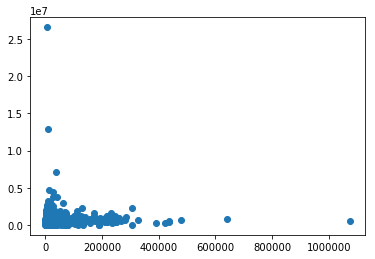

In [444]:
plt.scatter(houses['sqft_lot'], houses['price'])

Just by visualisation, there looks like 5 significant outliers

In [445]:
houses[houses['price'] > 2.5e7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4351,2014-07-03,26590000.0,3,2.0,1180,7793,1.0,0,0,4,1180,0,1992,NaN,12005 219th Ct SE,Kent,WA 98031,USA


Seems really expensive for a 3 bedroom house, 26mil? Remove it

In [446]:
houses.drop(4351,inplace=True)

In [447]:
houses[houses['price'] > 1e7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4347,2014-06-23,12899000.0,3,2.5,2190,11394,1.0,0,0,3,1550,640,1956,NaN,5426 40th Ave W,Seattle,WA 98199,USA


This one is 12m also a bit ridiculous, remove

In [448]:
houses.drop(4347,inplace=True)

In [449]:
houses[houses['price'] > 0.5e7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2286,2014-06-11,7062500.0,5,4.5,10040,37325,2.0,1,2,3,7680,2360,1940,2001.0,4442 95th Ave NE,Bellevue,WA 98004,USA


This one is 5 bedrooms, it's a lot bigger, but still 7mil is a bit high, check also for area against price

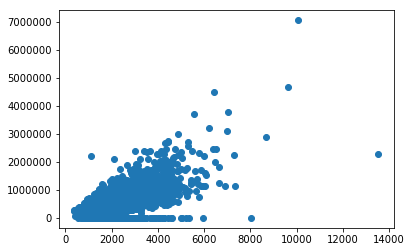

In [450]:
plt.scatter(houses['sqft_living'], houses['price'])

Looks like outlier as well, delete

In [451]:
houses.drop(2286,inplace=True)

In [452]:
houses[houses['sqft_lot'] > 800000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1078,2014-05-21,542500.0,5,3.25,3010,1074218,1.5,0,0,5,2010,1000,1931,NaN,16200-16398 252nd Ave SE,Issaquah,WA 98027,USA


Wow the land is way too big for the house, remove it

In [453]:
houses.drop(1078,inplace=True)

In [454]:
houses[houses['sqft_lot'] > 500000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2480,2014-06-13,849900.0,2,2.0,2280,641203,2.0,0,0,3,2280,0,1990,NaN,9326 216th St SW,Vashon,WA 98070,USA


This one as well

In [455]:
houses.drop(2480,inplace=True)

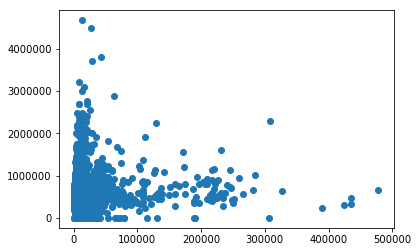

In [456]:
plt.scatter(houses['sqft_lot'], houses['price'])

Let's plot the sqft_living against price again

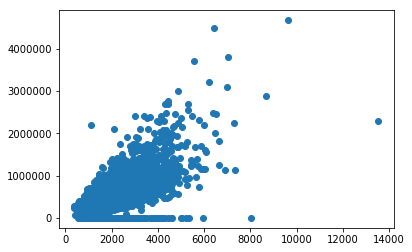

In [457]:
plt.scatter(houses['sqft_living'], houses['price'])

There is one outlier on the right, and maybe one on the left

In [458]:
houses[houses['sqft_living'] > 12000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
122,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,3,9410,4130,1999,NaN,26408 70th St NE,Redmond,WA 98053,USA


In [459]:
houses.drop(122,inplace=True)

In [460]:
houses[(houses['sqft_living'] < 2000) & (houses['price'] > 2e6)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4349,2014-05-05,2199900.0,4,1.5,1120,5427,1.0,0,0,3,1120,0,1969,2014.0,19009-19021 266th St SE,Covington,WA 98042,USA


This one seems too expensive, delete it

In [461]:
houses.drop(4349,inplace=True)

Next look at sqft_living with sqft_lot

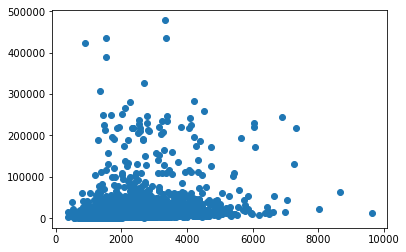

In [462]:
plt.scatter(houses['sqft_living'], houses['sqft_lot'])

In [463]:
houses[houses['sqft_lot'] > 380000]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
375,2014-05-08,330000.0,2,2.00,1550,435600,1.5,0,0,2,1550,0,1972,NaN,36521 94th St SE,Snoqualmie,WA 98065,USA
879,2014-05-19,480000.0,4,3.50,3370,435600,2.0,0,3,3,3370,0,2005,NaN,44250 Edgewick Rd SE,North Bend,WA 98045,USA
1539,2014-05-29,302000.0,2,1.00,900,423838,1.0,0,2,5,900,0,1925,NaN,18923 416th St SE,Enumclaw,WA 98022,USA
3056,2014-06-23,230000.0,3,1.00,1530,389126,1.5,0,0,4,1530,0,1919,NaN,24727 Mud Mountain Rd SE,Enumclaw,WA 98022,USA
3487,2014-06-26,667000.0,3,1.75,3320,478288,1.5,0,3,4,2260,1060,1933,1982.0,40201 292nd Ave SE,Enumclaw,WA 98022,USA


Maybe it's possible some houses just have large land

How about univariant?

{'boxes': [<matplotlib.lines.Line2D at 0x7f79887d1810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7988a10250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7988a6fb50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7988a6f9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f79887d14d0>,
  <matplotlib.lines.Line2D at 0x7f79887d18d0>]}

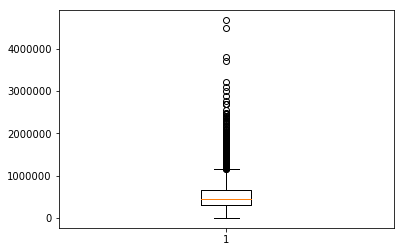

In [464]:
plt.boxplot(houses['price'])

It looks very skewed due to the fact that values can not be negative, so I'm goiong to use log instead

{'boxes': [<matplotlib.lines.Line2D at 0x7f7988b35710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7988b24910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f798874a7d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7988b249d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7988b352d0>,
  <matplotlib.lines.Line2D at 0x7f7988b35fd0>]}

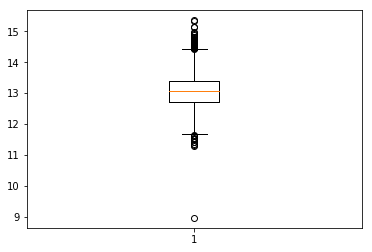

In [465]:
plt.boxplot([math.log(x) for x in houses['price'] if x != 0])

There is one obvious outlier at the bottom

In [466]:
houses[(houses['price'] < math.exp(9)) & (houses['price'] != 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4352,2014-05-06,7800.0,2,1.0,780,16344,1.0,0,0,1,780,0,1942,NaN,4229 144th St S,Tukwila,WA 98168,USA


That is way too cheap, remove it

In [467]:
houses.drop(4352,inplace=True)

Look at the other univariant outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f798855c1d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f798856d410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f798850fad0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f79884ff090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f798856d1d0>,
  <matplotlib.lines.Line2D at 0x7f798856db50>]}

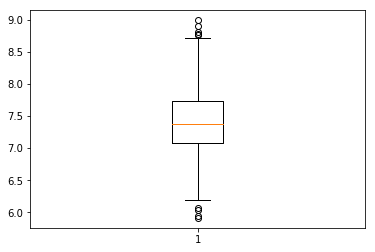

In [468]:
plt.boxplot([math.log(x) for x in houses['sqft_above']])

In [469]:
houses[(houses['sqft_above'] < math.exp(6.2))]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1219,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,2,430,0,1912,NaN,32215 Rutherford St E,Carnation,WA 98014,USA
2416,2014-06-12,280000.0,1,0.75,420,6720,1.0,0,0,3,420,0,1922,NaN,5550 17th Ave S,Seattle,WA 98108,USA
2919,2014-06-20,245000.0,1,0.75,380,15000,1.0,0,0,3,380,0,1963,NaN,13602 8th Ave S,Burien,WA 98168,USA
3778,2014-07-01,276000.0,1,0.75,370,1801,1.0,0,0,5,370,0,1923,NaN,2508 67th St NW,Seattle,WA 98117,USA
4184,2014-07-09,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,1959,NaN,11881 Tye River Rd NE,Skykomish,WA 98288,USA


3 bedroom house for only 490 sqft? Delete

In [470]:
houses.drop(4184, inplace=True)

Have a look at sqft_above in terms of berooms

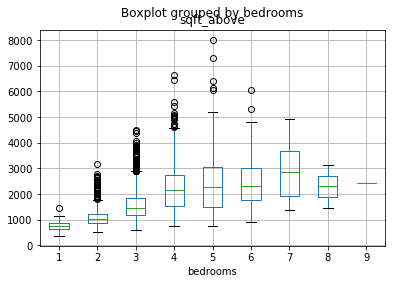

In [471]:
houses.boxplot(column = 'sqft_above', by='bedrooms')

See if we can get better information doing a log transform of sqft_above

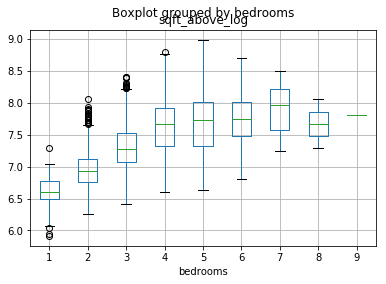

In [472]:
houses_copy = houses.copy()
houses_copy['sqft_above_log'] = [math.log(x) for x in houses_copy.sqft_above]
houses_copy.boxplot(column = 'sqft_above_log', by='bedrooms')

In [473]:
houses.groupby('bedrooms').describe()['sqft_above']

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
1,38.0,771.578947,228.869446,370.0,657.5,740.0,872.5,1470.0
2,563.0,1116.666075,388.168560,520.0,860.0,1020.0,1240.0,3160.0
3,2029.0,1596.388862,581.428078,610.0,1170.0,1450.0,1860.0,4500.0
4,1530.0,2237.899346,872.427882,740.0,1520.0,2150.0,2740.0,6640.0
5,351.0,2423.937322,1107.567253,760.0,1510.0,2270.0,3040.0,8020.0
6,61.0,2488.327869,1047.048625,900.0,1760.0,2300.0,3020.0,6050.0
7,13.0,2980.000000,1198.624211,1400.0,1940.0,2860.0,3700.0,4930.0
8,2.0,2305.000000,1180.868325,1470.0,1887.5,2305.0,2722.5,3140.0
9,1.0,2450.000000,NaN,2450.0,2450.0,2450.0,2450.0,2450.0


Looks ok, what about price

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


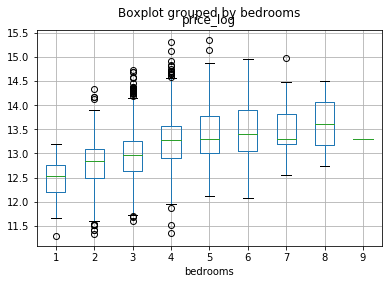

In [474]:
houses_copy = houses[houses['price'] != 0]
houses_copy['price_log'] = [math.log(x) for x in houses_copy.price]
houses_copy.boxplot(column = 'price_log', by='bedrooms')

Maybe 2 outliers for 4 bedroom houses at lower boundary as they are cheaper than 3 bedrooms.

In [475]:
houses[houses.price != 0].groupby('bedrooms').describe()['price']

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
1,36.0,2.846500e+05,1.163609e+05,80000.0,200000.0,275500.0,350750.0,540000.0
2,532.0,4.001342e+05,1.924217e+05,83000.0,267112.5,375000.0,488500.0,1695000.0
3,1928.0,4.763490e+05,2.521274e+05,110000.0,309000.0,429000.0,570250.0,2475000.0
4,1445.0,6.497149e+05,3.773148e+05,84350.0,402000.0,578000.0,785000.0,4489000.0
5,325.0,7.967217e+05,5.704182e+05,185000.0,443000.0,600000.0,950000.0,4668000.0
6,58.0,8.374276e+05,5.833725e+05,175000.0,466750.0,667500.0,1087500.0,3100000.0
7,13.0,9.547692e+05,8.067802e+05,280000.0,540000.0,599000.0,999000.0,3200000.0
8,2.0,1.155000e+06,1.152584e+06,340000.0,747500.0,1155000.0,1562500.0,1970000.0
9,1.0,5.999990e+05,NaN,599999.0,599999.0,599999.0,599999.0,599999.0


4 bedroom house for 84k?

In [476]:
houses[(houses.bedrooms == 4) & (houses.price != 0) & (houses.price <= 100000)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2203,2014-06-10,100000.0,4,1.0,1120,2685,1.0,0,0,3,860,260,1939,NaN,1006 5th St N,Renton,WA 98057,USA
4346,2014-06-01,84350.0,4,2.0,2630,16475,2.0,0,0,4,2630,0,1953,NaN,9033 32nd St NE,Yarrow Point,WA 98004,USA


4346 definitely too cheap, also the sqft_lot is very big, 2203 might be ok

In [477]:
houses.drop(4346, inplace=True)

Look at other attributes

{'boxes': [<matplotlib.lines.Line2D at 0x7f7980b1c090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7980b1cfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7980b13310>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7980b1dc90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7980b1c290>,
  <matplotlib.lines.Line2D at 0x7f7980b1c990>]}

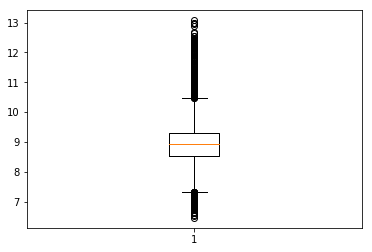

In [478]:
plt.boxplot([math.log(x) for x in houses['sqft_lot']])

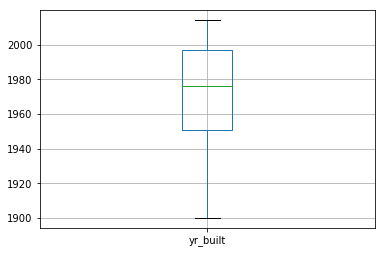

In [479]:
houses.boxplot(column = 'yr_built')

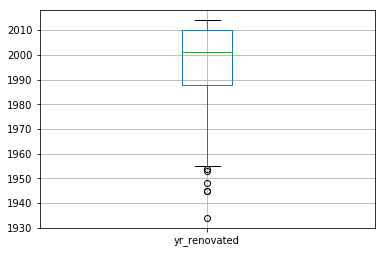

In [480]:
houses.boxplot(column = 'yr_renovated')

Houses last renovated in 1930s?

In [481]:
houses[houses.yr_renovated < 1950]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2483,2014-06-13,459950.0,3,1.75,1850,6869,1.0,0,2,5,1100,750,1919,1934.0,2221 154th St SW,Burien,WA 98166,USA
2594,2014-06-16,375000.0,4,2.00,2400,6000,2.0,0,0,3,2400,0,1913,1945.0,9801-9999 183rd St NE,Bothell,WA 98011,USA
3023,2014-06-22,565000.0,2,1.75,1330,6000,1.0,0,0,4,960,370,1914,1945.0,3009 Emerson St W,Seattle,WA 98199,USA
3633,2014-06-30,410000.0,1,1.50,1010,5750,1.0,0,0,3,1010,0,1911,1948.0,4611 Maple Way SW,Seattle,WA 98136,USA


Conditions are 3-5, not sure if 5 is good or bad?

In [482]:
houses[houses['price'] != 0].groupby(['condition']).mean()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated
condition,,,,,,,,,,,,
1,366400.000000,3.200000,1.200000,1434.000000,20392.800000,1.100000,0.000000,0.000000,1288.000000,146.000000,1930.400000,NaN
2,340665.333333,2.733333,1.466667,1551.000000,41243.200000,1.166667,0.033333,0.066667,1324.666667,226.333333,1949.666667,1960.000000
3,552054.322936,3.402202,2.271835,2204.277064,13758.961468,1.648073,0.005138,0.208440,1955.843303,248.433761,1980.470826,2001.363636
4,528660.566070,3.387042,1.941390,1991.762148,16054.183291,1.275362,0.008525,0.257460,1607.109122,384.653026,1958.350384,1985.358974
5,656605.672414,3.465517,2.088670,2096.943350,11755.965517,1.304187,0.007389,0.366995,1565.699507,531.243842,1944.325123,1976.090909


Looks like 5 is best condition, so house last renovated in 1934 is in condition 5 is a bit hard to believe

In [483]:
houses.drop(2483, inplace=True)

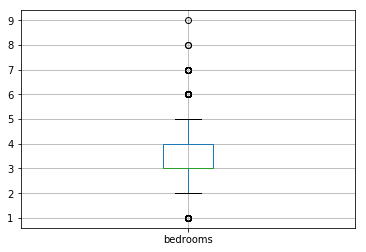

In [484]:
houses.boxplot(column = 'bedrooms')

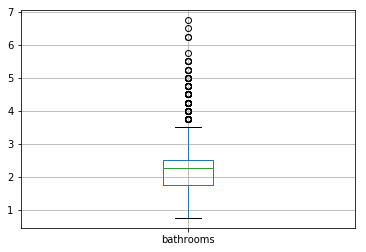

In [485]:
houses.boxplot(column = 'bathrooms')

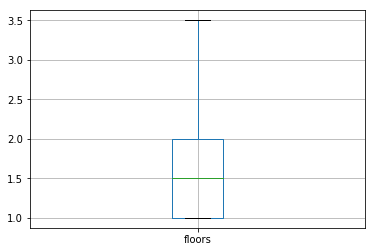

In [486]:
houses.boxplot(column = 'floors')

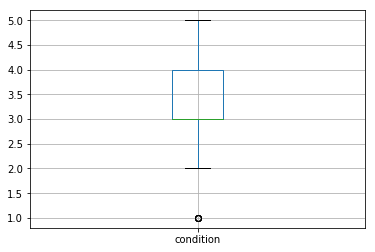

In [487]:
houses.boxplot(column = 'condition')

In [488]:
houses[houses['condition'] == 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
402,2014-05-09,255000.0,2,1.0,810,7980,1.0,0,0,1,810,0,1928,NaN,12727 2nd Ave SW,Seattle,WA 98146,USA
1422,2014-05-28,550000.0,4,1.0,1660,34848,1.0,0,0,1,930,730,1933,NaN,6056 156th Ave NE,Redmond,WA 98052,USA
2337,2014-06-11,427000.0,4,1.0,1860,4736,1.5,0,0,1,1860,0,1901,NaN,2411-2499 Roy St E,Seattle,WA 98112,USA
3034,2014-06-23,365000.0,4,2.0,1940,25600,1.0,0,0,1,1940,0,1962,NaN,4125 158th Ave SE,Bellevue,WA 98006,USA
3678,2014-06-30,235000.0,2,1.0,900,28800,1.0,0,0,1,900,0,1928,NaN,8406 Railroad Ave,Snoqualmie,WA 98065,USA


Prices are pretty low, seems ok

We have looked looked at most of the outliers found by both mahalanobis distance calculations, and a few other ones that are not picked up by mahalanobis distance. It seems the calculation was biased at picking up only upper boundary outliers but not lower boundary ones, due to the lower boundary being 0. 

In [489]:
houses[houses.index == 240]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
240,2014-05-07,630000.0,3,2.5,2680,327135,2.0,0,0,3,2680,0,1995,NaN,25339 248th St SE,Ravensdale,WA 98051,USA


This one is the only house with 9 bedrooms, it was picked up as an outlier but will keep it

# Missing values

In this section check for missing values, we already know that some prices are missing, do price prediction at the end

What other missing values?

In [490]:
houses.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     4360
street              0
city                0
statezip            0
country             0
dtype: int64

In [491]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4586 entries, 0 to 4600
Data columns (total 18 columns):
date             4586 non-null datetime64[ns]
price            4586 non-null float64
bedrooms         4586 non-null int64
bathrooms        4586 non-null float64
sqft_living      4586 non-null int64
sqft_lot         4586 non-null int64
floors           4586 non-null float64
waterfront       4586 non-null int64
view             4586 non-null int64
condition        4586 non-null int64
sqft_above       4586 non-null int64
sqft_basement    4586 non-null int64
yr_built         4586 non-null int64
yr_renovated     226 non-null float64
street           4586 non-null object
city             4586 non-null object
statezip         4586 non-null object
country          4586 non-null object
dtypes: datetime64[ns](1), float64(4), int64(9), object(4)
memory usage: 680.7+ KB


Maybe it is NaN because some houses just haven't been renovated since it's built, let's have a look at the year they are built

In [492]:
print(set(houses[houses.yr_renovated.isnull()].yr_built))

set([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])


Ok looks like even houses built in 1900 has no renovated year, looks like it is missing in that case

In [493]:
houses[houses.yr_built == houses.yr_renovated]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4342,2014-05-08,375000.0,6,2.25,3206,5793,2.0,0,0,3,3206,0,2012,2012.0,25921-25929 35th Pl S,Kent,WA 98032,USA


If not renovated then set it to same as year built, let's predict this value with linear model

drop all NaN values and keep only numeric columns for prediction, also we will not include price because we need to predict price afterwards so we don't want yr_renovated to be predicted from price, that will distort our price prediction later

In [494]:
houses_dropna = houses.dropna(how='any')
houses_dropna.drop(['city','country','statezip','street','date','price'],1,inplace=True)

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [495]:
len(houses_dropna)

226

Check no NaN values

In [496]:
houses_dropna.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

And the orignal

In [497]:
houses.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     4360
street              0
city                0
statezip            0
country             0
dtype: int64

Because the constraint yr_renovated can not be earlier than yr_built, and can not be renovated after 2014, I will add a new col (yr_renovated - yr_built) / (2014 - yr_built)

In [498]:
houses_dropna['diff'] = (houses_dropna.yr_renovated - houses_dropna.yr_built) / (2014 - houses_dropna.yr_built)

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


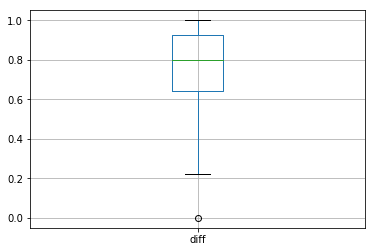

In [499]:
houses_dropna.boxplot(column='diff')

In [500]:
houses_dropna[houses_dropna['diff'] < 0.2]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,diff
4342,6,2.25,3206,5793,2.0,0,0,3,3206,0,2012,2012.0,0.0


This is the house where yr_built = yr_renovated

In [501]:
houses_dropna['diff'].unique()

array([ 0.73684211,  0.30232558,  0.90625   ,  0.84761905,  0.22222222,
        0.42105263,  0.91176471,  0.71428571,  0.984375  ,  1.        ,
        0.98461538,  0.99082569,  0.73333333,  0.75471698,  0.77777778,
        0.36956522,  0.68831169,  0.54545455,  0.88043478,  0.85365854,
        0.91489362,  0.8627451 ,  0.98913043,  0.81052632,  0.48148148,
        0.75280899,  0.92473118,  0.48837209,  0.48333333,  0.74736842,
        0.67961165,  0.61111111,  0.96969697,  0.70909091,  0.57843137,
        0.76923077,  0.87671233,  0.59322034,  0.98888889,  0.90350877,
        0.85227273,  0.79220779,  0.75      ,  0.93150685,  0.49152542,
        0.61538462,  0.95522388,  0.91891892,  0.81904762,  0.38356164,
        0.97560976,  0.98039216,  0.77027027,  0.83333333,  0.71028037,
        0.7254902 ,  0.63235294,  0.72815534,  0.64835165,  0.34693878,
        0.94444444,  0.91397849,  0.98387097,  0.93506494,  0.85135135,
        0.91011236,  0.82432432,  0.98924731,  0.546875  ,  0.84

set up another df for prediction, drop non nemueric columns and yr_renovated, price

In [502]:
houses_predict = houses[houses.yr_renovated.isnull()].drop(['city','country','statezip','street','date','yr_renovated','price'],1)

In [503]:
houses_predict.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976


Use linear regression

In [504]:
lm_for_houses = LinearRegression()

Now fit the model with target value = diff

In [505]:
lm_for_houses.fit(houses_dropna[[x for x in houses_dropna.columns if (x != 'yr_renovated') & (x != 'diff')]],houses_dropna['diff'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Next predict

In [506]:
diff = lm_for_houses.predict(houses_predict)

In [507]:
houses_predict['diff'] = diff

In [508]:
houses_predict['diff'].describe()

count    4360.000000
mean        0.704318
std         0.096739
min         0.330561
25%         0.641092
50%         0.719293
75%         0.777161
max         1.080755
Name: diff, dtype: float64

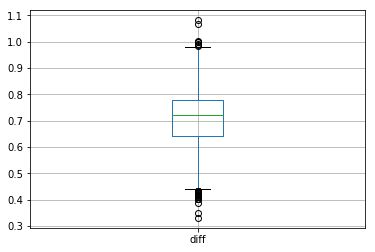

In [509]:
houses_predict.boxplot(column='diff')

We can't have diff > 1, that means the house is renovated after 2014

In [510]:
houses_predict[houses_predict['diff'] > 1]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,diff
402,2,1.0,810,7980,1.0,0,0,1,810,0,1928,1.080755
1422,4,1.0,1660,34848,1.0,0,0,1,930,730,1933,1.003223
3678,2,1.0,900,28800,1.0,0,0,1,900,0,1928,1.065067


Set them to 1 the upper boundary

In [511]:
houses_predict['diff'][houses_predict['diff'] > 1] = 1

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Now calculate yr_renovated

In [512]:
houses_predict['yr_renovated'] = houses_predict['diff'] * (2014 - houses_predict['yr_built']) + houses_predict['yr_built']

Round up to whole year

In [513]:
houses_predict['yr_renovated'] = [int(round(x)) for x in houses_predict['yr_renovated']]

In [514]:
houses_predict.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,diff,yr_renovated
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,0.769753,2000
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0.454877,1963
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0.624107,1996
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0.719693,2000
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,0.684160,2002


Double check any out of boundary

In [515]:
houses_predict[houses_predict['yr_renovated'] < houses_predict['yr_built']]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,diff,yr_renovated


In [516]:
houses_predict[houses_predict['yr_renovated'] > 2014]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,diff,yr_renovated


Looks good, now put this in houses df

In [517]:
houses['yr_renovated'][houses.yr_renovated.isnull()] = houses_predict['yr_renovated']

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [518]:
houses[houses.yr_renovated.isnull()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


Compare boxplot for both imputed and dropped

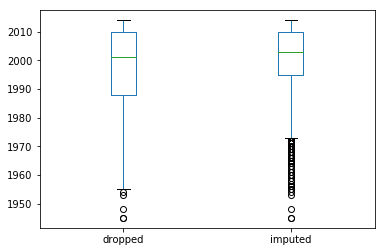

In [519]:
boxplot = pd.DataFrame({'imputed': houses['yr_renovated'],'dropped': houses_dropna['yr_renovated']})
boxplot.plot(kind='box')

Now we can convert this column to int as there are no NaN values

In [520]:
houses.yr_renovated = houses.yr_renovated.astype(int)

Finally we can predict price

In [521]:
houses[houses.price == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4353,2014-05-02,0.0,4,2.50,2200,9397,2.0,0,0,3,2200,0,1987,2007,5214 292nd St S,Auburn,WA 98001,USA
4354,2014-05-05,0.0,3,1.00,1340,306848,1.0,0,0,3,1340,0,1953,1988,17827 Mountain View Rd NE,Duvall,WA 98019,USA
4355,2014-05-05,0.0,3,1.75,1490,10125,1.0,0,0,4,1490,0,1962,1995,3911 328th St S,Federal Way,WA 98001,USA
4356,2014-05-05,0.0,4,2.50,2800,5900,1.0,0,0,3,1660,1140,1963,2004,7052 39th Ave NE,Seattle,WA 98115,USA
4357,2014-05-05,0.0,4,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,1999,2120 31st Ave W,Seattle,WA 98199,USA
4358,2014-05-05,0.0,6,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1993,12271 Marine View Dr SW,Burien,WA 98146,USA
4359,2014-05-06,0.0,5,3.50,3480,36615,2.0,0,0,4,2490,990,1983,2003,21809 38th Pl SE,Issaquah,WA 98075,USA
4360,2014-05-06,0.0,3,3.50,3020,4082,2.0,0,0,3,2080,940,1954,2004,3401-3599 Arapahoe Pl W,Seattle,WA 98199,USA
4361,2014-05-06,0.0,3,2.25,1970,11088,1.0,0,0,4,1180,790,1967,2000,18738-18798 49th Pl NE,Lake Forest Park,WA 98155,USA
4362,2014-05-07,0.0,5,1.50,1500,7112,1.0,0,0,5,760,740,1920,1968,14901-14999 12th Ave SW,Burien,WA 98166,USA


First check linear correlation for dependant variables, we need to drop of variables that have high correlation

In [522]:
pearsonr(houses.sqft_living, houses.sqft_above)

(0.87282765180090582, 0.0)

sqft_living and sqft_above have high correlation, we can drop off sqft_living, as sqft_above + sqft_basement will give information on sqft_living

In [523]:
houses_drop_zero_price = houses[houses.price != 0]
houses_drop_zero_price.drop(['country','street','sqft_living'],1,inplace=True)

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [524]:
len(houses_drop_zero_price)

4338

Next we want to use city and statezip so change city to a norminal value

In [525]:
citylist = list(houses['city'].unique())
city = []
for i in houses_drop_zero_price['city']:
    city.append(citylist.index(i))
houses_drop_zero_price['city'] = city

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Take out WA 98 as this is same for all records, use last 3 digits

In [527]:
zipcode = []
for i in houses_drop_zero_price.index:
    
    newzip = int(re.sub('WA 98','',houses_drop_zero_price['statezip'][i]))
    zipcode.append(newzip)
houses_drop_zero_price['statezip'] = zipcode

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Change date column to ordinal

In [528]:
houses_drop_zero_price['date'] = houses_drop_zero_price['date'].map(dt.datetime.toordinal)

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Try with different models for prediction. Use linear regression, random forest regression and Gradient Boosting and compare results

In [529]:
rf_for_houses = RandomForestRegressor(n_estimators=100, random_state=5)
gb_for_houses = GradientBoostingRegressor(max_depth=5, subsample = 0.8,random_state=5)

In [530]:
houses_drop_zero_price.shape

(4338, 15)

Set up X and y, use log transform for price as we saw before it is very skewed

In [196]:
y = [math.log(x) for x in houses_drop_zero_price['price']]
X = houses_drop_zero_price[[x for x in houses_drop_zero_price.columns if (x != 'price')]]

Split into test and train

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 5)

Run regressions

In [198]:
lm_for_houses.fit(X_train,y_train)
rf_for_houses.fit(X_train,y_train)
gb_for_houses.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=5, subsample=0.8, verbose=0,
             warm_start=False)

Following function implements root mean square log error(kaggle)

In [216]:
def rmsle(predicted,real):
    sum=0.0
    for x in range(1,len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

Run predictions and print out rmse

In [217]:
pred_lm_log = lm_for_houses.predict(X_test)
pred_lm = [math.exp(x) for x in pred_lm_log]
print 'Linear Regression: ', rmsle(pred_lm,[math.exp(x) for x in y_test])
pred_rf_log = rf_for_houses.predict(X_test)
pred_rf = [math.exp(x) for x in pred_rf_log]
print 'Random Forest: ', rmsle(pred_rf,[math.exp(x) for x in y_test])
pred_gb_log = gb_for_houses.predict(X_test)
pred_gb = [math.exp(x) for x in pred_gb_log]
print 'Gradient Boost: ', rmsle(pred_gb,[math.exp(x) for x in y_test])

Linear Regression:  0.34480814216
Random Forest:  0.253529698322
Gradient Boost:  0.155156873319


Also print out r-square score

In [218]:
print 'r-squared for linear regression = ', lm_for_houses.score(X_test,y_test)
print 'r-squared for Random Forest = ', rf_for_houses.score(X_test,y_test)
print 'r-squared for Gradiant Boost = ', gb_for_houses.score(X_test,y_test)

r-squared for linear regression =  0.57645133389
r-squared for Random Forest =  0.770547588472
r-squared for Gradiant Boost =  0.913931055755


Gradient boost works best, we can use that to fit the whole dataset

In [219]:
gb_for_houses.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=5, subsample=0.8, verbose=0,
             warm_start=False)

Set up prediction dataframe

In [220]:
houses_predict = houses[houses.price == 0].drop(['country','street','sqft_living'],1)

In [221]:
city = []
for i in houses_predict['city']:
    city.append(citylist.index(i))
houses_predict['city'] = city

In [222]:
zipcode = []
for i in houses_predict.index:
    newzip = int(re.sub('WA 98','',houses_predict['statezip'][i]))
    zipcode.append(newzip)
houses_predict['statezip'] = zipcode

In [223]:
houses_predict['date'] = houses_predict['date'].map(dt.datetime.toordinal)

In [224]:
houses_predict.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
4353,735355,0.0,4,2.50,9397,2.0,0,0,3,2200,0,1987,2007,9,1
4354,735358,0.0,3,1.00,306848,1.0,0,0,3,1340,0,1953,1988,21,19
4355,735358,0.0,3,1.75,10125,1.0,0,0,4,1490,0,1962,1995,12,1
4356,735358,0.0,4,2.50,5900,1.0,0,0,3,1660,1140,1963,2004,1,115
4357,735358,0.0,4,2.75,5390,1.0,0,0,4,1300,1300,1960,1999,1,199


Do final price prediction, make sure to convert back from log and round to whole number

In [229]:
houses_final = houses.copy()
pred_log = gb_for_houses.predict(houses_predict.drop(['price'],axis=1)) 
pred = [round(math.exp(x)) for x in pred_log]

In [227]:
pred

[302632.0,
 316379.0,
 232463.0,
 679258.0,
 537059.0,
 510391.0,
 752497.0,
 802729.0,
 382632.0,
 249075.0,
 875610.0,
 361205.0,
 526803.0,
 336212.0,
 539419.0,
 321558.0,
 191586.0,
 421998.0,
 1014359.0,
 498293.0,
 655113.0,
 436149.0,
 510838.0,
 693833.0,
 461135.0,
 481332.0,
 340999.0,
 368095.0,
 559554.0,
 831958.0,
 725153.0,
 1789736.0,
 365226.0,
 1513587.0,
 326815.0,
 290560.0,
 486572.0,
 1217676.0,
 417017.0,
 374174.0,
 312618.0,
 396042.0,
 695637.0,
 320301.0,
 604202.0,
 469920.0,
 1892479.0,
 485073.0,
 1330637.0,
 218826.0,
 650111.0,
 829771.0,
 310503.0,
 1703688.0,
 292346.0,
 279896.0,
 489136.0,
 350399.0,
 299081.0,
 248364.0,
 377998.0,
 304598.0,
 263724.0,
 286123.0,
 517819.0,
 297254.0,
 254381.0,
 690344.0,
 289826.0,
 366355.0,
 174750.0,
 504149.0,
 253582.0,
 149457.0,
 317667.0,
 371595.0,
 1452852.0,
 831126.0,
 622876.0,
 209068.0,
 1634908.0,
 293331.0,
 435517.0,
 332859.0,
 323348.0,
 440034.0,
 327787.0,
 392042.0,
 388208.0,
 532206.0,
 

Now write to the price column in houses_final

In [230]:
houses_final['price'][houses['price'] == 0] = pred

/home/lei/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Write to csv

In [231]:
houses_final.to_csv('Qian_29115566_ass2_data.csv',index=False,date_format = '%Y%m%dT%H%M%S')

# Summary

The hardest task is outlier detection, it seems quite arbitrary to determine which ones are outliers, even though we have some rules such as 3 standard deviation from the mean, MAD, and quantiles for univariant analysis and mahalanobis distance for multivariant analysis, they serve as guildlines only. Also feature selection is another challenging area, knowing which features to use for modelling requires domain knowladge, also testing for collinearity is important

# References:
kaggle, https://www.kaggle.com/wiki/RootMeanSquaredLogarithmicError
Mahalanobis distance http://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html